In [2]:
%matplotlib inline
import math
import time
import numpy as np

In [3]:
class Timer:
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        self.tik = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]

In [4]:
timer = Timer()

**Example With Pytorch**

In [6]:
!pip install d2l

import torch
from d2l import torch as d2l

     |████████████████████████████████| 82 kB 630 kB/s 
     |████████████████████████████████| 9.9 MB 9.6 MB/s 
     |████████████████████████████████| 61 kB 7.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.1 MB/s 
     |████████████████████████████████| 11.6 MB 30.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the pa

In [7]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [8]:

timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.01987 sec'

**Example with TensorFlow**

In [9]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [10]:
n = 10000
a = tf.ones(n)
b = tf.ones(n)

In [11]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.01311 sec'

**Class Dataset**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Nova secção

In [6]:
class Dataset:
  def __init__(self, filename = None, X = None, Y = None):
    if filename is not None:
      self.readDataset(filename)
    elif X is not None and Y is not None:
      self.X = X
      self.Y = Y
  
  def readDataset(self, filename, sep = ","):
    data = np.genfromtxt(filename, delimiter=sep)
    self.X = data[:,0:-1]
    self.Y = data[:,-1]
  
  def getXy (self):
    return self.X, self.Y

**Testing the class and visualizing the dataset**

In [7]:
from google.colab import files

In [8]:
uploaded = files.upload()

Saving lr-example1.data to lr-example1 (1).data
Saving lr-example2.data to lr-example2 (1).data


In [16]:
#pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.3 requires matplotlib==3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Shape Atributos: (97, 1)
Shape Labels: (97, 1)


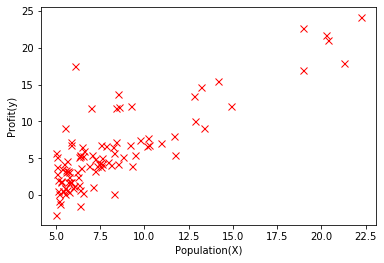

In [9]:
def plotData_2vars(X, Y, xlabel, ylabel):
    plt.plot(X, Y, 'rx', markersize=7)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

def test_dataset(ds_path):
    d = Dataset(ds_path)
    X,y = d.getXy()
    print(f"Shape Atributos: {X.shape}")
    print(f"Shape Labels: {X.shape}")
    plotData_2vars(X,y,"Population(X)", "Profit(y)")

test_dataset("lr-example1.data")

**Normalizing the Data**

In [10]:
def standardize(X):
 Xmed = np.mean(X, axis = 0)
 Xsigma = np.std(X, axis = 0)
 return (X-Xmed)/Xsigma

In [11]:
def normalize(X):
 Xmax = np.max(X, axis = 0)
 Xmin = np.min(X, axis = 0)
 return (X-Xmin)/(Xmax-Xmin)

In [12]:
def test_standardize():
 d = Dataset("lr-example1.data")
 X,y = d.getXy()
 Xs= standardize(X)
 print(f"Shape Atributos: {Xs.shape}")
 plotData_2vars(Xs,y,"Population(X)", "Profit(y)")

In [13]:
def test_normalize():
 d = Dataset("lr-example1.data")
 X,y = d.getXy()
 Xn= normalize(X)
 print(f"Shape Atributos: {Xn.shape}")
 plotData_2vars(Xn,y,"Population(X)", "Profit(y)")

Shape Atributos: (97, 1)


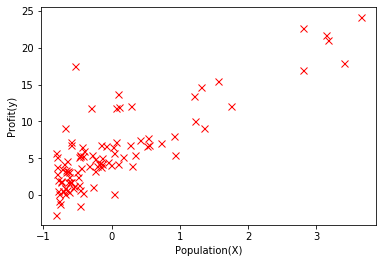

In [14]:
test_standardize()


Shape Atributos: (97, 1)


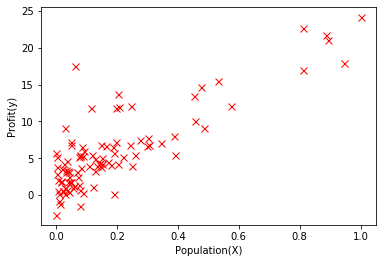

In [15]:
test_normalize()

**Testing With Several Attributes**

Shape Atributos: (47, 2)
Shape Labels: (47, 2)


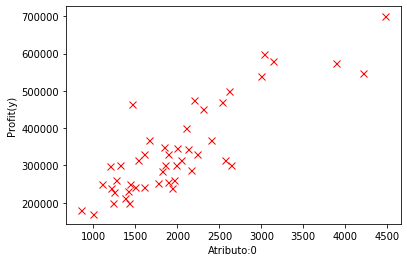

Shape Atributos: (47, 2)
Shape Labels: (47, 2)


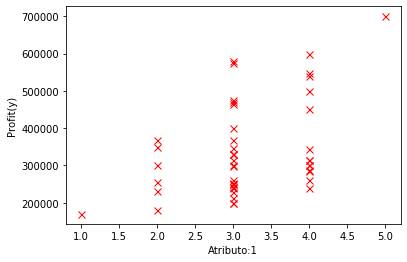

In [16]:
def test_dataset_multi(ds_path,coluna=0):
 d = Dataset(ds_path)
 X,y = d.getXy()
 print(f"Shape Atributos: {X.shape}")
 print(f"Shape Labels: {X.shape}")
 plotData_2vars(X[:,coluna],y,f"Atributo:{coluna}", "Profit(y)")


test_dataset_multi("lr-example2.data",0)
test_dataset_multi("lr-example2.data",1) 

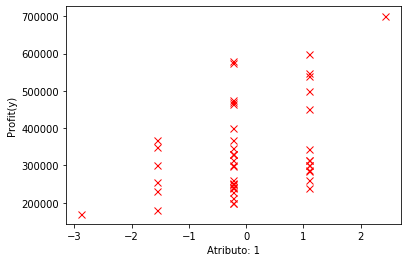

In [17]:
def test_standardize():
 print(f"############# Atributos Standardizados ##################")
 d = Dataset("lr-example2.data")
 X,y = d.getXy()
 Xs= standardize(X)
 print(f"Shape Atributos: {Xs.shape}")
 plotData_2vars(Xs[:,0],y,"Atributo: 0", "Profit(y)")
 plotData_2vars(Xs[:,1],y,"Atributo: 1", "Profit(y)")
 
test_standardize()

############# Atributos Normalizados ##################
Shape Atributos: (47, 2)


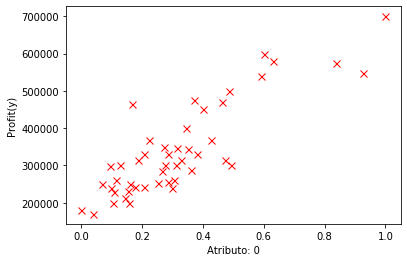

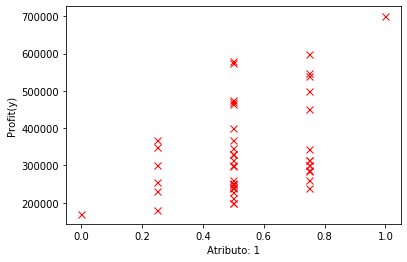

In [18]:
def test_normalize():
 print(f"############# Atributos Normalizados ##################")
 d = Dataset("lr-example2.data")
 X,y = d.getXy()
 Xn= normalize(X)
 print(f"Shape Atributos: {Xn.shape}")
 plotData_2vars(Xn[:,0],y,"Atributo: 0", "Profit(y)")
 plotData_2vars(Xn[:,1],y,"Atributo: 1", "Profit(y)")
 
test_normalize()

**Class LinearRegression**

In [19]:
def error_sqe(predictions,y):
  m = predictions.shape[0]
  #predictions = np.dot(self.X, self.theta)
  sqe = (predictions - y) ** 2
  res = np.sum(sqe) / (2*m)
  return res

In [24]:
class LinearRegression:

  def __init__(self, dataset, standardization = False, regularization = False, lamda = 1): 
    self.X, self.y = dataset.getXy()
    self.standardization = standardization
    self.regularization = regularization
    self.lamda = lamda
    self.X = np.hstack ((np.ones([self.X.shape[0],1]), self.X ))
    self.theta = np.zeros(self.X.shape[1])
    if self.standardization:
      self.X[:,1:] = standardize(self.X[:,1:])


  def buildModel(self):
    from numpy.linalg import inv
    if self.regularization:
      self.theta = self.analyticalWithReg()
    else:
      self.theta = inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.y)

  def analyticalWithReg(self):
    from numpy.linalg import inv
    matl = np.zeros([self.X.shape[1], self.X.shape[1]])
    for i in range(1,self.X.shape[1]):
      matl[i,i] = self.lamda
    theta = inv(self.X.T.dot(self.X) + matl).dot(self.X.T).dot(self.y)
    return theta



  def predictions (self): #previsões dos casos de teste
    return np.dot(self.X, self.theta)


  def predict(self, instance):
    x = np.empty([self.X.shape[1]])
    x[0] = 1 #na 1ª posição coloca um 1
    x[1:] = np.array(instance[:self.X.shape[1]-1])
    print(instance)
    print(x)
    if self.standardization:
      #x[1:] = (x[1:] - self.mu) / self.sigma
      x[1:] = standardize(x[1:])
    return np.dot(self.theta, x)


  def costFunction(self):
    J = error_sqe(self.predictions(),self.y)
    return J


  def getXy (self):
    return self.X[:,1], self.y

  def getX (self):
    return self.X

  def get_theta (self):
    return self.theta

  def gradientDescent (self, iterations = 1000, alpha = 0.001):
    m = self.X.shape[0]
    n = self.X.shape[1]
    self.theta = np.zeros(n)
    if self.regularization:
      lamdas = np.zeros([self.X.shape[1]])
      for i in range(1,self.X.shape[1]):
        lamdas[i] = self.lamda
    for its in range(iterations):
      #predictions = np.dot(self.X, self.theta)
      J = error_sqe(self.predictions(),self.y)
      if its%100 == 0: print(J)
      delta = self.X.T.dot(self.X.dot(self.theta) - self.y)
      if self.regularization:
        self.theta -= (alpha/m * (lamdas+delta))
    else: self.theta -= (alpha/m * delta )

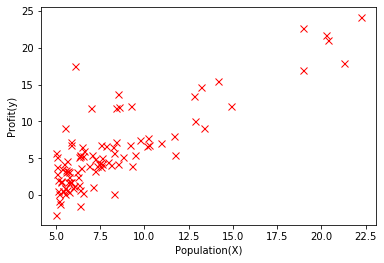

Cost function value for theta with zeros:
32.072733877455676


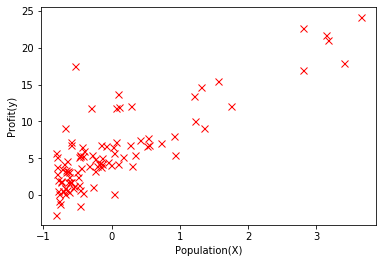

Cost function value for theta with zeros:
32.072733877455676


In [25]:
def test_2var_1(regul = False):
 ds= Dataset("lr-example1.data")
 if regul:
  lrmodel = LinearRegression(ds, True, True, 100.0)
 else:
  lrmodel = LinearRegression(ds)
 X,y = lrmodel.getXy()
 plotData_2vars(X,y,"Population(X)", "Profit(y)")
 print("Cost function value for theta with zeros:")
 print(lrmodel.costFunction())

 
test_2var_1(False)
test_2var_1(True)

In [35]:
def plotDataAndModel(X, Y, pred, xlabel, ylabel):
    plt.plot(X, Y, 'rx', markersize=7)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(X, pred, color='b')
    plt.show()


Model with analytical solution. Regularização = False
Cost function value for theta from analytical solution. Regularização = False
4.476971375975179
Casos. Regularização = False
Shape: (97,)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
Labels. Regularização 

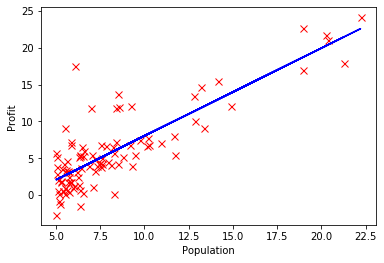

Model with analytical solution. Regularização = True
Cost function value for theta from analytical solution. Regularização = True
7.194901089799715
Casos. Regularização = True
Shape: (97,)
[-0.53240565 -0.68368294  0.09319761 -0.30042464 -0.5974206   0.0579498
 -0.17751184  0.10865262 -0.4347144  -0.80656976 -0.63614904  1.55957946
 -0.63009691  0.06457337 -0.6543314  -0.72220358 -0.46609197 -0.78695878
 -0.44941614 -0.28286567 -0.51188555  3.14560127 -0.69344947 -0.47630007
 -0.67402031  2.80143506  1.21255602  0.72656735  1.30294835  3.64769432
 -0.75519159 -0.40790839  0.28270982 -0.58910866  0.01332508 -0.05880697
 -0.0165979  -0.66326674  1.214634   -0.46920894 -0.71506051 -0.33177623
  0.92163816 -0.61978491 -0.08704158 -0.27707328 -0.80251769 -0.61258989
  0.91956017 -0.68007244 -0.16093991 -0.74082752 -0.19114862 -0.14460176
 -0.47455975 -0.46778033 -0.48978099 -0.65459115  0.2988142   0.33606207
  0.17288833 -0.77417917  3.40768709  1.75283204  2.80507153 -0.2445788
  0.035143

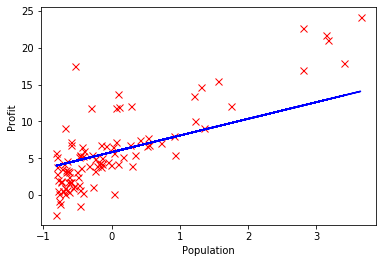

In [36]:
def test_2var_3(regul = False):
    ds= Dataset("lr-example1.data")
    if regul:
        lrmodel = LinearRegression(ds, True, True, 100.0)
    else:
        lrmodel = LinearRegression(ds)
    print(f"Model with analytical solution. Regularização = {regul}")
    lrmodel.buildModel()
    print(f"Cost function value for theta from analytical solution. Regularização = {regul}")
    print(lrmodel.costFunction())
    X,y = lrmodel.getXy()
    print(f"Casos. Regularização = {regul}")
    print(f"Shape: {X.shape}")
    print(X)
    print(f"Labels. Regularização = {regul}")
    print(f"Shape: {y.shape}")
    print(y)
    print(f"Coeficientes da solução analitica. Regularização = {regul}")
    theta = lrmodel.get_theta ()
    print(f"Shape: {theta.shape}")
    print(theta)
    print(f"Previsão para os casos de Treino usando o modelo. Regularização = {regul}")
    pred = lrmodel.predictions()
    print(pred.shape)
    print(pred)
    plotDataAndModel(X,y,pred, "Population", "Profit")

test_2var_3(False)
test_2var_3(True)